Data processing to check the data set paths is working or not 


In [2]:
!pip install setuptools



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install tensorflow as tf

ERROR: Could not find a version that satisfies the requirement as (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for as


Found 184 files belonging to 5 classes.
Using 148 files for training.
Found 184 files belonging to 5 classes.
Using 36 files for validation.
Class Names: ['Botrytis blight', 'Downy mildew', 'Fire Blight', 'Powdery mildew', 'crown gall']


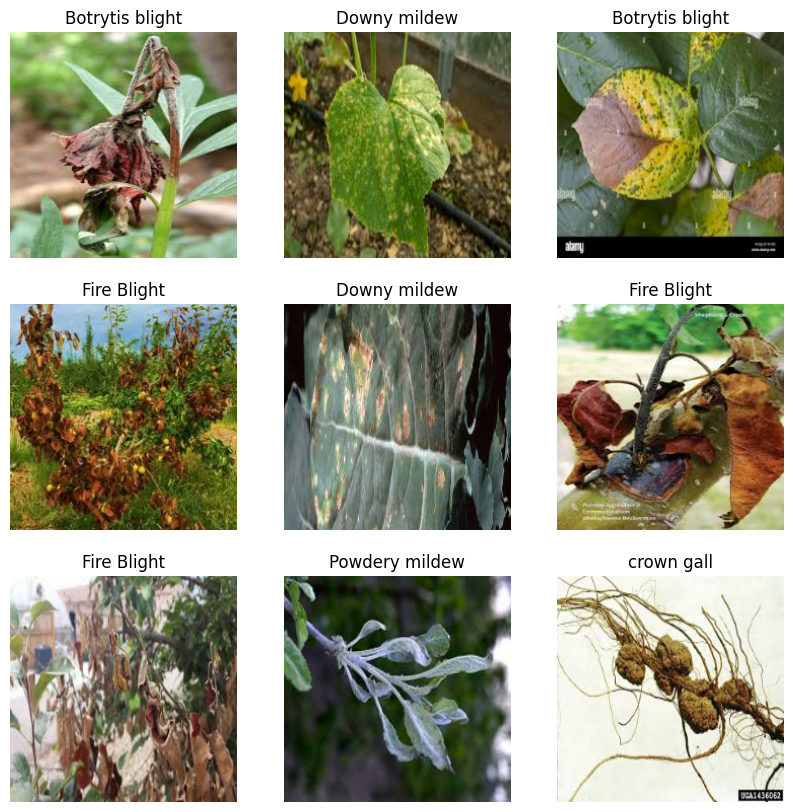

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define dataset path
dataset_path = "plant_dieases"  # Replace with your actual dataset path

# Check if dataset path exists
if not os.path.exists(dataset_path):
    print("Dataset path does not exist.")
    exit()

# Load dataset
batch_size = 32
img_height = 224
img_width = 224

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class Names:", class_names)

# Visualize some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Prefetching for performance improvement
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define paths
data_dir = 'plant_dieases'  # Replace with the path to your dataset

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Load the dataset
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # 20% of data for validation
    subset="training",
    seed=123,  # Random seed for reproducibility
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# List class names
class_names = train_ds.class_names
print("Class Names: plant_diseases", class_names)

Found 184 files belonging to 5 classes.
Using 148 files for training.
Found 184 files belonging to 5 classes.
Using 36 files for validation.
Class Names: plant_diseases ['Botrytis blight', 'Downy mildew', 'Fire Blight', 'Powdery mildew', 'crown gall']


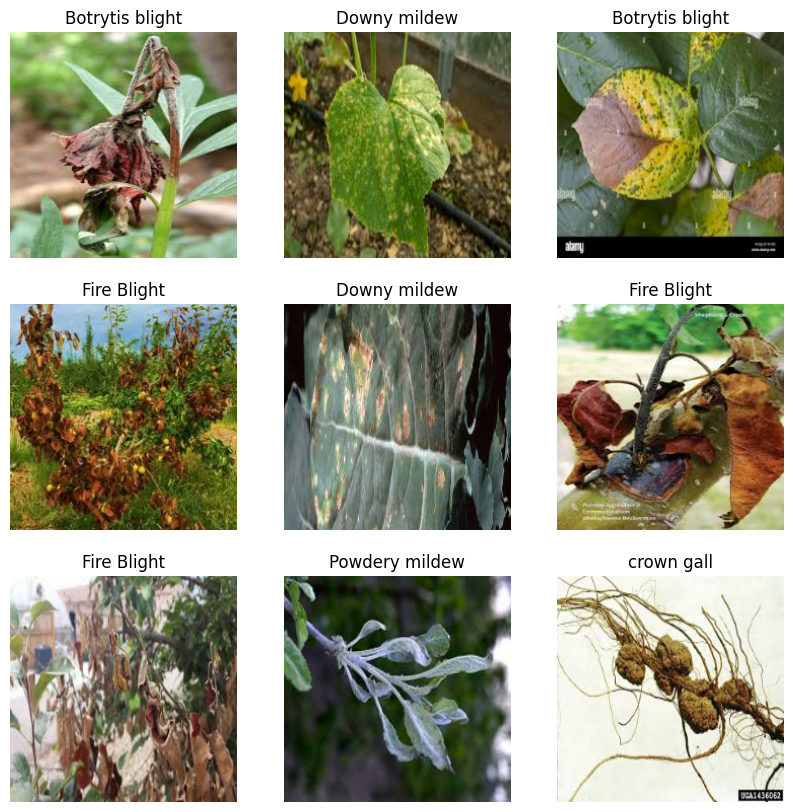

In [5]:
import matplotlib.pyplot as plt

# Visualize some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [6]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' if labels are one-hot encoded
              metrics=['accuracy'])

# Print model summary
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
epochs = 20

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Save the model
model.save('plant_disease_model.h5')
print("Model saved!")

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 35s 5s/step - accuracy: 0.2163 - loss: 4.9626 - val_accuracy: 0.2222 - val_loss: 1.5941
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.2671 - loss: 1.6091 - val_accuracy: 0.3889 - val_loss: 1.5222
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3032 - loss: 1.6023 - val_accuracy: 0.1111 - val_loss: 1.5992
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.3152 - loss: 1.5331 - val_accuracy: 0.1111 - val_loss: 1.6284
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.3613 - loss: 1.5037 - val_accuracy: 0.3889 - val_loss: 1.4694
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.3942 - loss: 1.4065 - val_accuracy: 0.3333 - val_loss: 1.4806
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.5555 - loss: 1.2571 - val_accuracy: 0.3056 - val_loss: 1.3657
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.5540 - loss: 1.0520 - val_accuracy: 0.3889 - val_loss: 1.3408
Epoch 9/

Model saved!


In [10]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.4421 - loss: 1.8532
Validation Accuracy: 44.44%


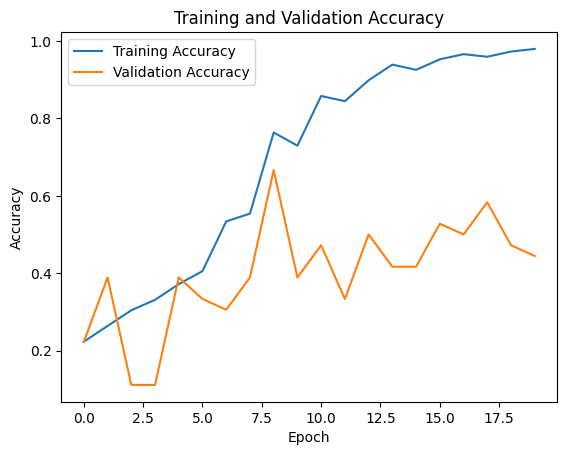

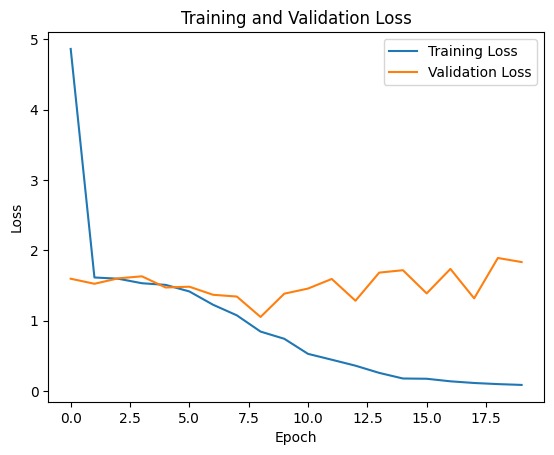

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [15]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Define image dimensions (must match training dimensions)
img_height, img_width = 224, 224

# Define class names (must match the order used during training)
class_names = ['Botrytis blight', 'Downy mildew', 'Fire blight', 'Powdery mildew', 'Crown gall']

# Load the saved model
model = load_model('plant_disease_model.h5')

# Function to preprocess and predict
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return class_names[predicted_class[0]]

# Test the function
img_path = 'images (2).jpg'  # Replace with the path to your test image
predicted_class = predict_image(img_path)
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Crown gall
